In [120]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [121]:
adir = 'F:/data/cruise_data/saildrone/2019_arctic/daily_files/'
iusv = 1036
file = adir + 'arctic_2019_sd'+str(iusv)+'-NRT-1_min-v1.nc'
ds = xr.open_dataset(file)
ds['spd']=np.sqrt(ds.UWND_MEAN**2+ds.VWND_MEAN**2)

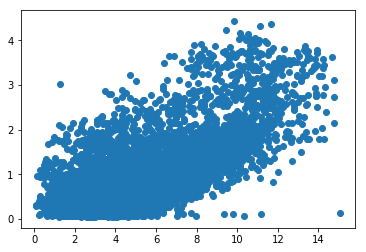

In [122]:
plt.scatter(ds.spd,ds.WAVE_SIGNIFICANT_HEIGHT)

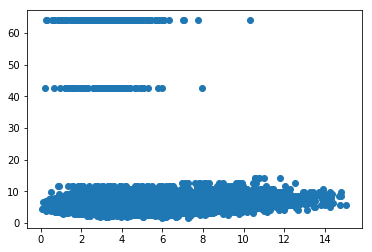

In [123]:
plt.scatter(ds.spd,ds.WAVE_DOMINANT_PERIOD)

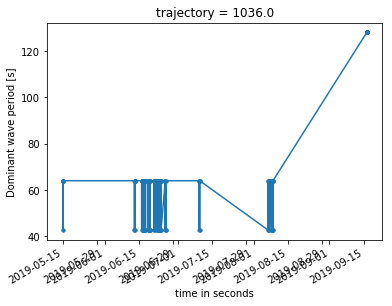

In [124]:
subset=ds.where(ds.WAVE_DOMINANT_PERIOD>20,drop=True)
subset.WAVE_DOMINANT_PERIOD.plot(marker='.')

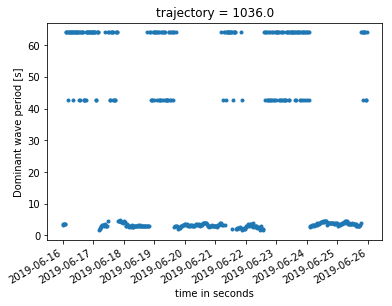

In [28]:
print(subset.time.data)

['2019-05-14T19:00:00.000000000' '2019-05-14T19:30:00.000000000'
 '2019-05-14T20:00:00.000000000' '2019-05-14T20:30:00.000000000'
 '2019-05-14T21:00:00.000000000' '2019-05-14T21:30:00.000000000'
 '2019-05-14T22:00:00.000000000' '2019-05-14T22:30:00.000000000'
 '2019-05-14T23:00:00.000000000' '2019-06-13T04:30:00.000000000'
 '2019-06-13T05:00:00.000000000' '2019-06-13T05:30:00.000000000'
 '2019-06-13T06:00:00.000000000' '2019-06-13T06:30:00.000000000'
 '2019-06-13T07:00:00.000000000' '2019-06-13T07:30:00.000000000'
 '2019-06-13T08:00:00.000000000' '2019-06-13T08:30:00.000000000'
 '2019-06-13T09:00:00.000000000' '2019-06-13T09:30:00.000000000'
 '2019-06-13T10:00:00.000000000' '2019-06-13T10:30:00.000000000'
 '2019-06-16T02:30:00.000000000' '2019-06-16T03:00:00.000000000'
 '2019-06-16T03:30:00.000000000' '2019-06-16T04:00:00.000000000'
 '2019-06-16T04:30:00.000000000' '2019-06-16T05:00:00.000000000'
 '2019-06-16T05:30:00.000000000' '2019-06-16T06:00:00.000000000'
 '2019-06-16T06:30:00.000

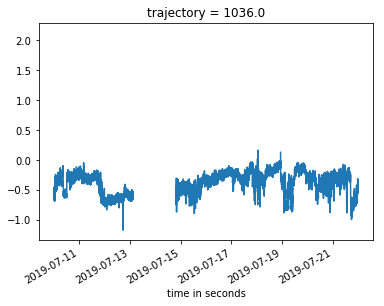

In [44]:
(ds.TEMP_IR_SEA_WING_UNCOMP_MEAN-ds.TEMP_SBE37_MEAN).sel(time=slice('2019-07-10','2019-07-21')).plot()

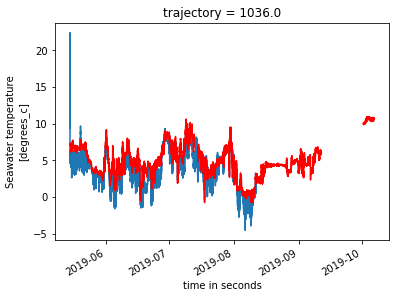

In [48]:
(.96*ds.TEMP_IR_SEA_HULL_UNCOMP_MEAN+0.04*ds.TEMP_IR_SKY_HULL_MEAN).plot()
ds.TEMP_SBE37_MEAN.plot(color='r')

In [85]:
ds=ds.isel(time=slice(200,-1))

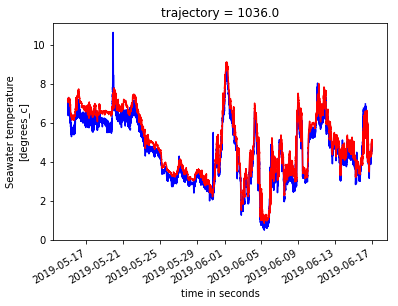

In [112]:
#ds.TEMP_IR_SEA_HULL_UNCOMP_MEAN.plot(color='k')
ds2 = ds.sel(time=slice('2019-05-15','2019-06-16'))
skin=.99*ds2.TEMP_IR_SEA_WING_UNCOMP_MEAN-.01*ds2.TEMP_IR_SKY_HULL_MEAN
#(.98*ds2.TEMP_IR_SEA_WING_UNCOMP_MEAN-.02*ds2.TEMP_IR_SKY_HULL_MEAN).plot(color='b')
skin.plot(color='b')
ds2.TEMP_SBE37_MEAN.plot(color='r')
#0.04*(ds2.TEMP_IR_SKY_HULL_MEAN).plot()

In [114]:
skin=.99*ds2.TEMP_IR_SEA_WING_UNCOMP_MEAN-.01*ds2.TEMP_IR_SKY_HULL_MEAN
print((skin-ds2.TEMP_SBE37_MEAN).std().data)
skin=ds2.TEMP_IR_SEA_WING_UNCOMP_MEAN
print((skin-ds2.TEMP_SBE37_MEAN).std().data)

0.2670825129210383
0.2950309002115863


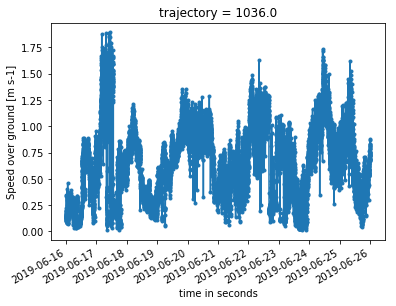

In [71]:
subset=ds.sel(time=slice('2019-06-16','2019-06-25'))
subset.SOG.plot(marker='.')

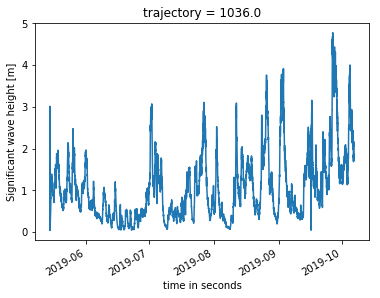

In [67]:
subset = ds.where(np.isfinite(ds.WAVE_SIGNIFICANT_HEIGHT),drop=True)
subset.WAVE_SIGNIFICANT_HEIGHT.plot()

[<xarray.DataArray 'TEMP_IR_SEA_HULL_UNCOMP_MEAN' (time: 208012)>
 array([nan, nan, nan, ..., nan, nan, nan])
 Coordinates:
     trajectory  float32 ...
   * time        (time) datetime64[ns] 2019-05-14T18:12:00 ... 2019-10-06T20:59:00
     lat         (time) float64 ...
     lon         (time) float64 ...
 Attributes:
     standard_name:              sea_surface_skin_temperature
     long_name:                  Hull Sea IR Temperature
     units:                      degrees_c
     update_period:              1000
     nominal_sampling_schedule:  30s on, 270s off, centered at :00
     installed_height:           0.6
     vendor_name:                Heitronics
     model_name:                 CT15.10,
 <xarray.DataArray 'TEMP_IR_SKY_HULL_MEAN' (time: 208012)>
 array([nan, nan, nan, ..., nan, nan, nan])
 Coordinates:
     trajectory  float32 ...
   * time        (time) datetime64[ns] 2019-05-14T18:12:00 ... 2019-10-06T20:59:00
     lat         (time) float64 ...
     lon         (time) 

In [77]:
import numpy as np
from sklearn.linear_model import LinearRegression
#cond = np.isfinite(ds.TEMP_IR_SEA_HULL_UNCOMP_MEAN) # & np.isfinite(ds.TEMP_IR_SKY_HULL_MEAN) & np.isfinite(ds.TEMP_SBE37_MEAN)
#ds2=ds[cond]
ds2 = ds.where(np.isfinite(ds.TEMP_IR_SEA_HULL_UNCOMP_MEAN))
ds2 = ds2.where(np.isfinite(ds.TEMP_IR_SKY_HULL_MEAN))
ds2 = ds2.where(np.isfinite(ds.TEMP_SBE37_MEAN))


In [78]:
X = [ds2.TEMP_IR_SEA_HULL_UNCOMP_MEAN, ds2.TEMP_IR_SKY_HULL_MEAN]
# y = 1 * x_0 + 2 * x_1 + 3
y = ds2.TEMP_SBE37_MEAN
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_) 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
#diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()